In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

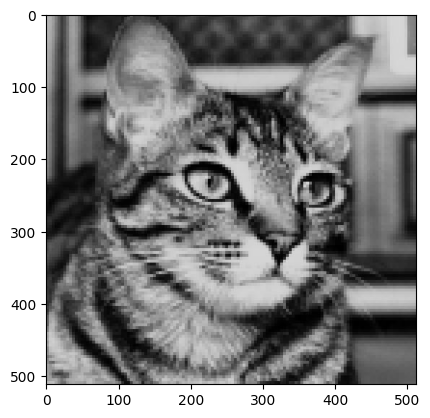

In [3]:

img = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

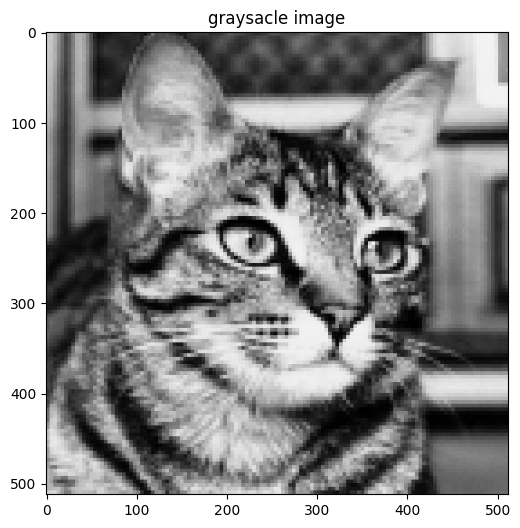

In [4]:
grayScaleImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 6))
plt.title("graysacle image")
plt.imshow(grayScaleImage, cmap='gray')

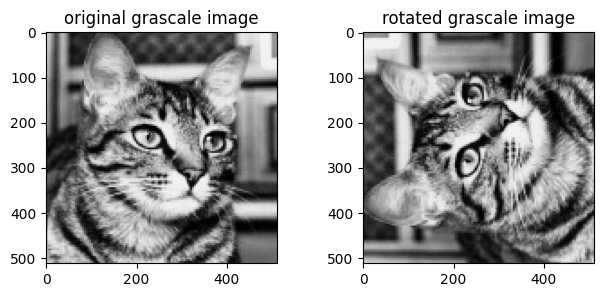

In [5]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 1, 1)
plt.title("original grascale image")
plt.imshow(grayScaleImage, cmap='gray')

(width, height) = grayScaleImage.shape
center = (width // 2, height // 2)
angle = 90  # Rotate by 30 degrees
scale = 1 #scale (zoom in when > 1 or zoom out when <1)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(grayScaleImage, rotation_matrix, (width, height))

plt.subplot(1, 2, 2)
plt.title("rotated grascale image")
plt.imshow(rotated_img, cmap = 'gray')

(512, 512)
(256, 256)
(128, 128)
(64, 64)
(32, 32)
(16, 16)
(8, 8)
(4, 4)


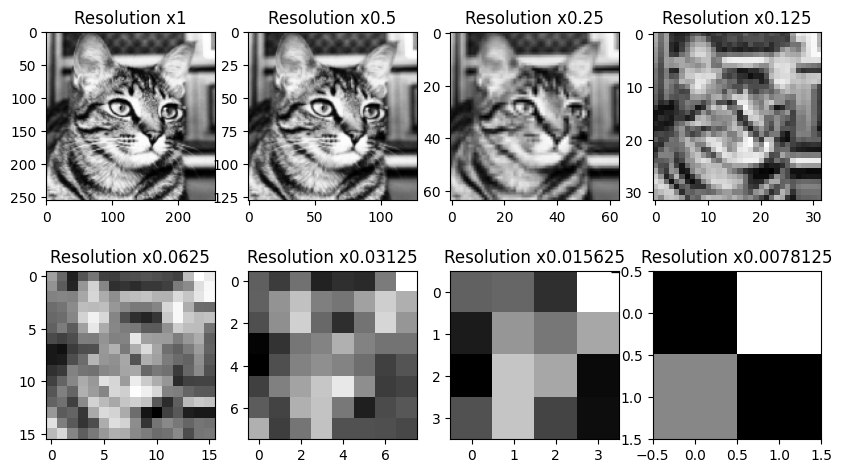

In [6]:
from PIL import Image
img = Image.fromarray(grayScaleImage)
plt.figure(figsize=(10, 15))
for i in range(0, 8):
    print(np.asarray(img).shape)
    new_shape = (img.width // 2, img.height // 2)
    img_resized = img.resize(new_shape, Image.BICUBIC)
    plt.subplot(5, 4, i+1)
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Resolution x{2**-i}")
    img = img_resized


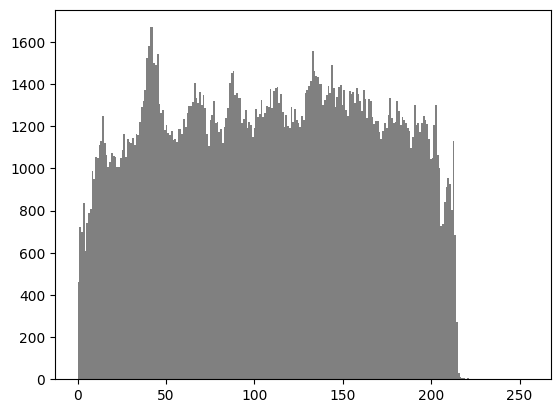

In [7]:
oneDArray = []
for i in range(grayScaleImage.shape[0]):
    for j in range(grayScaleImage.shape[1]): 
        oneDArray.append(grayScaleImage[i, j])
a = plt.hist(oneDArray, bins=256, range=(0, 255), color='gray')

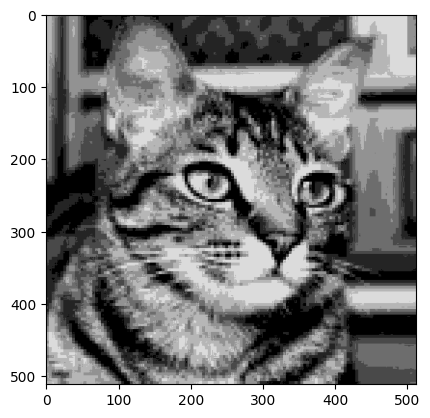

In [13]:
newImg = img & 224

plt.imshow(newImg, cmap='gray')

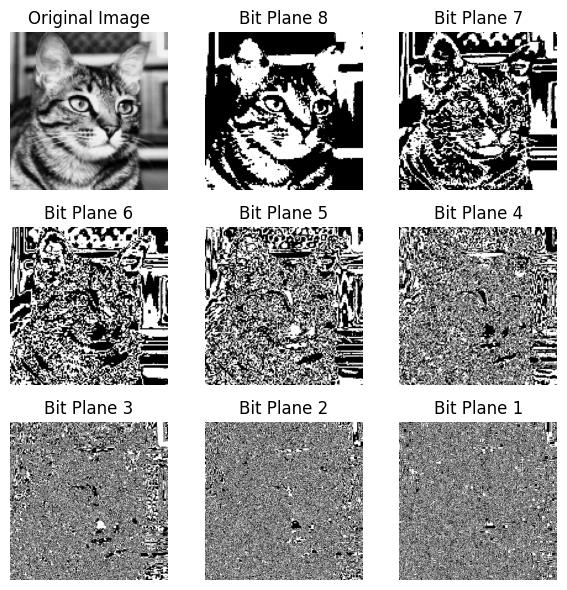

In [14]:

img = grayScaleImage
bit_planes = []

for i in range(8):
  bit_plane = img & (2 ** (7 - i))
  bit_planes.append(bit_plane)

plt.figure(figsize=(6, 6))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

for i in range(8):
    plt.subplot(3, 3, i + 2)
    plt.title(f'Bit Plane {(8 - i)}')
    plt.imshow(bit_planes[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


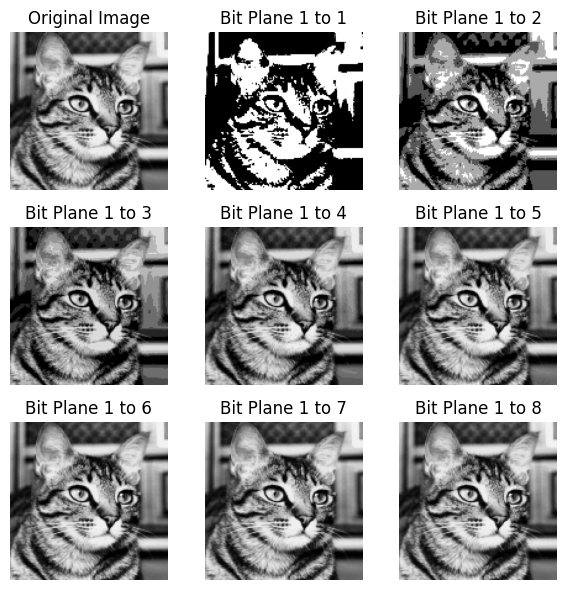

In [15]:
combined_imgs = []
combined_img = np.zeros_like(img, dtype=np.uint8)


for plane in bit_planes:
    combined_img |= plane
    combined_imgs.append(combined_img.copy())
plt.figure(figsize=(6, 6))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

for i in range(8):
    plt.subplot(3, 3, i + 2)
    plt.title(f'Bit Plane 1 to {(i + 1)}')
    plt.imshow(combined_imgs[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

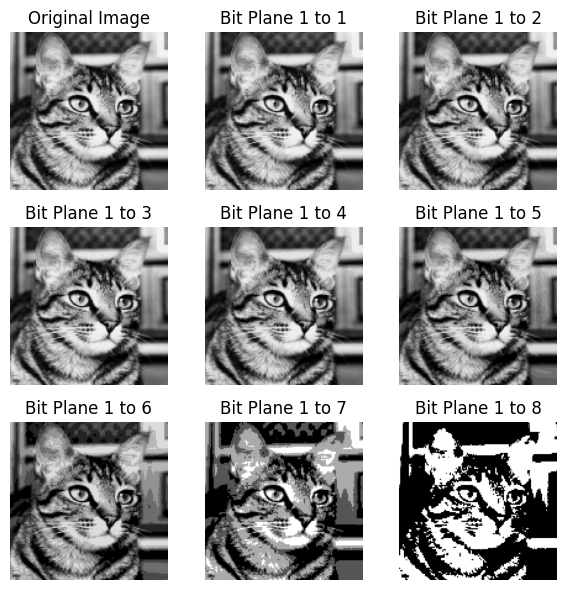

In [17]:
combined_imgs = []
combined_img = np.zeros_like(img, dtype=np.uint8)

bit_planes = bit_planes[::-1]

for plane in bit_planes:
    combined_img |= plane
    combined_imgs.append(combined_img.copy())

combined_imgs = combined_imgs[::-1]

plt.figure(figsize=(6, 6))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

for i in range(8):
    plt.subplot(3, 3, i + 2)
    plt.title(f'Bit Plane 1 to {(i + 1)}')
    plt.imshow(combined_imgs[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()